In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.dummy import DummyClassifier

In [2]:
merged_train_df = pd.read_csv("../data/processed/df_outlier_flag.csv") 

X = merged_train_df.drop(['status_group'], axis=1)
y = merged_train_df['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.54      1.00      0.70      5105
         1.0       0.00      0.00      0.00       718
         2.0       0.00      0.00      0.00      3681

    accuracy                           0.54      9504
   macro avg       0.18      0.33      0.23      9504
weighted avg       0.29      0.54      0.38      9504



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
imputed_train_df = pd.read_csv("../data/processed/lat_lon_imputed.csv")

X = imputed_train_df.drop(['id','status_group'], axis=1)
y = imputed_train_df['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_test)

print(classification_report(y_test, y_pred))

                         precision    recall  f1-score   support

             functional       0.54      1.00      0.70      6449
functional needs repair       0.00      0.00      0.00       854
         non functional       0.00      0.00      0.00      4577

               accuracy                           0.54     11880
              macro avg       0.18      0.33      0.23     11880
           weighted avg       0.29      0.54      0.38     11880



/Users/mariam/Documents/DC/HydroLogic/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mariam/Documents/DC/HydroLogic/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mariam/Documents/DC/HydroLogic/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [2]:
cleaned_train_df = pd.read_csv("../data/processed/lat_lon_imputed_cleaned.csv")

X = cleaned_train_df.drop(['status_group'], axis=1)
y = cleaned_train_df['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4577
           1       0.54      1.00      0.70      6449
           2       0.00      0.00      0.00       854

    accuracy                           0.54     11880
   macro avg       0.18      0.33      0.23     11880
weighted avg       0.29      0.54      0.38     11880



/Users/mariam/Documents/DC/HydroLogic/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mariam/Documents/DC/HydroLogic/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mariam/Documents/DC/HydroLogic/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Simple encoding
X = X.fillna('missing')
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.89      0.84      5135
         1.0       0.55      0.35      0.43       683
         2.0       0.84      0.78      0.81      3686

    accuracy                           0.81      9504
   macro avg       0.73      0.67      0.69      9504
weighted avg       0.80      0.81      0.80      9504



In [4]:
y_train.value_counts(normalize=True)

0.0    0.543271
2.0    0.383233
1.0    0.073495
Name: status_group, dtype: float64

In [11]:
pip install imbalanced-learn


  Using cached imbalanced_learn-0.12.4-py3-none-any.whl (258 kB)
  Using cached scikit_learn-1.3.2-cp38-cp38-win_amd64.whl (9.3 MB)
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.1
    Uninstalling joblib-1.0.1:
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\joblib-1.0.1.dist-info\\direct_url.json'
Consider using the `--user` option or check the permissions.



In [7]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

ModuleNotFoundError: No module named 'imblearn'

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}


In [15]:
search = RandomizedSearchCV(
    model,
    param_distributions=param_grid,
    scoring='f1_macro',
    cv=3,
    n_iter=20,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   5.7s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   5.8s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   5.8s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   6.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   6.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   6.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   6.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   random_state=42, scoring='f1_macro', verbose=2)

In [16]:
from sklearn.metrics import classification_report

best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Params:", search.best_params_)
print("F1 Macro:", search.best_score_)
print(classification_report(y_test, y_pred))


Best Params: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30}
F1 Macro: 0.6833394757747514
              precision    recall  f1-score   support

           0       0.85      0.78      0.81      4562
           1       0.81      0.90      0.85      6465
           2       0.62      0.34      0.44       853

    accuracy                           0.81     11880
   macro avg       0.76      0.67      0.70     11880
weighted avg       0.81      0.81      0.81     11880



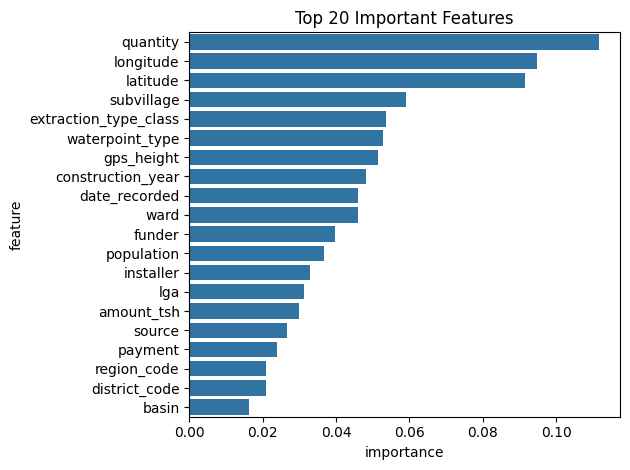

In [17]:
feat_names = X_train.columns
feat_imp = search.best_estimator_.feature_importances_

imp_df = pd.DataFrame({
    'feature': feat_names,
    'importance': feat_imp
}).sort_values(by='importance', ascending=False)

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=imp_df.head(20), x='importance', y='feature')
plt.title("Top 20 Important Features")
plt.tight_layout()
plt.show()


In [18]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(search.best_estimator_, X, y, cv=5, scoring='f1_macro')
print(f"CV F1-macro mean: {scores.mean():.3f}")

CV F1-macro mean: 0.679


In [33]:
cat_train_df = pd.read_csv("../data/processed/lat_lon_imputed.csv")

In [34]:
cat_train_df.shape

(59400, 41)

In [ ]:
cat_train_df = cat_train_df.drop(['region','public_meeting','scheme_name','quantity_group','extraction_type','extraction_type_group','payment_type','quality_group','source_type','waterpoint_type_group'], axis=1)
cat_train_df.shape

In [ ]:
categorical_columns = [
    'date_recorded','funder', 'installer','subvillage','lga','ward', 'basin', 'scheme_management', 'permit', 
    'extraction_type', 'extraction_type_group','extraction_type_class', 'management', 'management_group','payment_type', 'payment', 'water_quality', 
    'quantity', 'quality_group', 'source','source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group'
]

In [35]:
Xc = cat_train_df.drop(['status_group'], axis=1)
yc = cat_train_df['status_group']